In [211]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import scikitplot as skplt
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

In [287]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
data=pd.read_csv("diabetes.csv",names=col_names, header=0)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [288]:
X = data.iloc[:,:-1] # Features
y = data.outcome

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [290]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

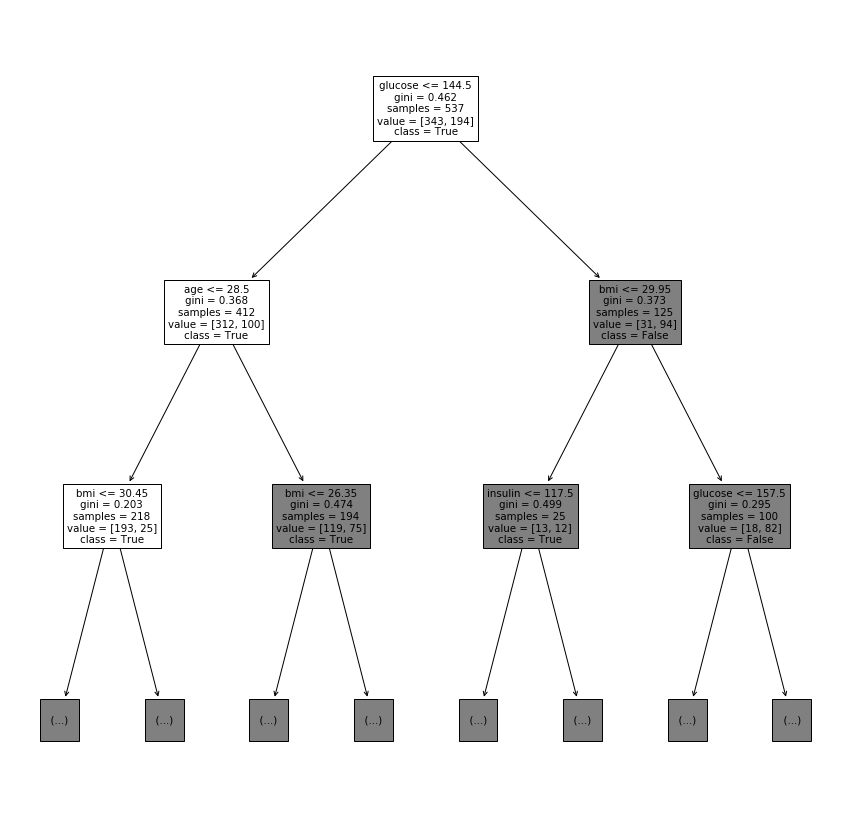

In [293]:
plt.figure(figsize=(15,15))
features=X.columns
tree.plot_tree(dtree,feature_names=X.columns,class_names=['True','False'],max_depth=2);

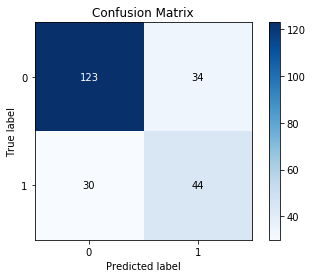

In [274]:
#Predict the response for test dataset
predictions = dtree.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, predictions)

In [294]:
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7489177489177489
F1 0.5857142857142857


## Impact of max_depth

In [296]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=0)
parameters = {'max_depth':range(1,100)}
dt_cv = GridSearchCV(dt, parameters,cv=5, return_train_score=True,scoring="f1")
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 100)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True

In [297]:
# scores of GridSearch CV
scores = dt_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007758,0.001537,0.004909,0.001600,1,{'max_depth': 1},0.407407,0.617647,0.638298,0.595745,...,0.557083,0.083795,5,0.547826,0.581673,0.659155,0.672673,0.603053,0.612876,0.046945
1,0.005447,0.000989,0.002614,0.000530,2,{'max_depth': 2},0.407407,0.617647,0.545455,0.560976,...,0.531560,0.069153,96,0.547826,0.581673,0.457944,0.692580,0.603053,0.576615,0.076268
2,0.011506,0.003509,0.008622,0.003173,3,{'max_depth': 3},0.377358,0.474576,0.658824,0.558140,...,0.513780,0.093105,98,0.545455,0.549550,0.685015,0.734177,0.613546,0.625548,0.074393
3,0.017078,0.002629,0.009438,0.002689,4,{'max_depth': 4},0.666667,0.696629,0.527778,0.533333,...,0.606833,0.068270,1,0.744479,0.738170,0.646388,0.749091,0.761394,0.727905,0.041462
4,0.015788,0.004556,0.007563,0.002404,5,{'max_depth': 5},0.692308,0.613333,0.591549,0.434783,...,0.579975,0.083776,2,0.777778,0.755396,0.729927,0.795539,0.777143,0.767156,0.022550


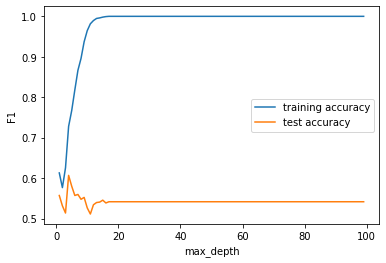

{'max_depth': 4}


In [298]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1")
plt.legend()
plt.show()
print(dt_cv.best_params_)

In [299]:
DT=DecisionTreeClassifier(max_depth=4, random_state=0)
DT.fit(X_train,y_train)
predictions = DT.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7489177489177489
F1 0.6184210526315789


## impact of min_samples_split

In [300]:
dt=DecisionTreeClassifier(random_state=0)
parameters = {'min_samples_split':range(2,150,10)}
dt_cv = GridSearchCV(dt, parameters,cv=5, return_train_score=True,scoring="f1")
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(2, 150, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [301]:
# scores of GridSearch CV
scores = dt_cv.cv_results_
pd.DataFrame(scores).head();

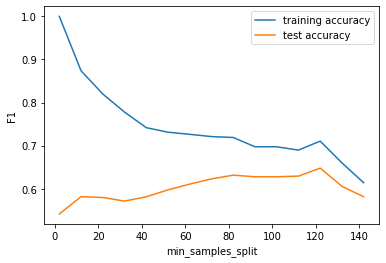

{'min_samples_split': 122}


In [302]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("F1")
plt.legend()
plt.show()
print(dt_cv.best_params_)

In [303]:
DT=DecisionTreeClassifier(min_samples_split=122, random_state=0)
DT.fit(X_train,y_train)
predictions = DT.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,predictions))
print("F1",metrics.f1_score(y_test,predictions))

Accuracy 0.7489177489177489
F1 0.5857142857142857
